In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
df = pd.read_csv("nyc-taxi3.csv")
df.head()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
0,1.0,9.40,15,2,1,None,False,29.058824,24.0,3.0,6.185714,44.30
1,NaN,14.75,13,4,1,None,False,0.000000,6.0,0.0,4.571930,44.80
2,1.0,3.35,23,4,1,None,False,0.000000,1.0,0.0,4.384091,18.96
3,1.0,3.33,18,2,1,None,False,29.058824,24.0,3.0,6.185714,16.30
4,1.0,0.47,17,6,1,None,False,0.000000,1.0,0.0,3.846429,5.30


In [246]:
df.describe()
#df.corr()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,snowDepth,precipTime,precipDepth,temperature,totalAmount
count,11147.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11617.000000
mean,1.348704,2.866139,13.633884,3.223879,3.502898,1.609015,12.028379,190.782342,10.314244,14.724534
std,1.015296,2.905810,6.670530,1.961855,1.707729,7.146771,10.158597,1211.087724,8.500600,10.966517
min,1.000000,0.010000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-13.379464,3.300000
25%,1.000000,1.060000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,3.566372,8.150000
50%,1.000000,1.900000,15.000000,3.000000,4.000000,0.000000,6.000000,3.000000,10.318229,11.300000
75%,1.000000,3.620000,19.000000,5.000000,5.000000,0.000000,24.000000,41.000000,17.239744,17.800000
max,6.000000,62.550000,23.000000,6.000000,6.000000,67.090909,24.000000,9999.000000,26.524107,339.380000


In [247]:
df.isna().sum()

passengerCount          587
tripDistance              0
hour_of_day               0
day_of_week               0
month_num                 0
normalizeHolidayName      0
isPaidTimeOff             0
snowDepth                 0
precipTime                0
precipDepth               0
temperature               0
totalAmount             117
dtype: int64

In [248]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df, "totalAmount")
df = df[(df['totalAmount'] > lower) & (df['totalAmount'] < upper)]
upper, lower = outliers(df, "tripDistance")
df = df[(df['tripDistance'] > lower) & (df['tripDistance'] < upper)]

<AxesSubplot:xlabel='tripDistance', ylabel='totalAmount'>

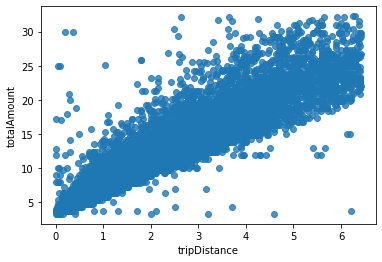

In [249]:
sns.regplot(x="tripDistance", y="totalAmount", data=df)

<AxesSubplot:xlabel='day_of_week', ylabel='totalAmount'>

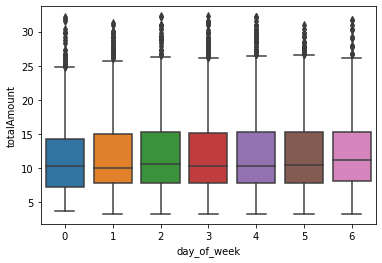

In [250]:
sns.boxplot(x="day_of_week", y="totalAmount", data=df)

<AxesSubplot:xlabel='passengerCount', ylabel='totalAmount'>

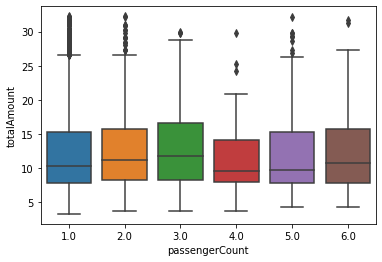

In [251]:
sns.boxplot(x="passengerCount", y="totalAmount", data=df)

In [252]:
df.isna().sum()

passengerCount          520
tripDistance              0
hour_of_day               0
day_of_week               0
month_num                 0
normalizeHolidayName      0
isPaidTimeOff             0
snowDepth                 0
precipTime                0
precipDepth               0
temperature               0
totalAmount               0
dtype: int64

In [253]:
df["passengerCount"] = df["passengerCount"].fillna(df["passengerCount"].mean())

In [254]:
bins = [-1, 6, 12, 18, 25]
labels =[1,2,3,4]
df['time'] = pd.cut(df['hour_of_day'], bins,labels=labels)


In [255]:
df['time'].unique()

[4, 3, 2, 1]
Categories (4, int64): [1 < 2 < 3 < 4]

In [256]:
bins = [-1, 4, 8]
labels =[1,2]
df['weekend'] = pd.cut(df['day_of_week'], bins,labels=labels)
df.head()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount,time,weekend
2,1.0,3.35,23,4,1,None,False,0.000000,1.0,0.0,4.384091,18.96,4,1
3,1.0,3.33,18,2,1,None,False,29.058824,24.0,3.0,6.185714,16.30,3,1
4,1.0,0.47,17,6,1,None,False,0.000000,1.0,0.0,3.846429,5.30,3,2
5,1.0,3.07,9,1,1,None,False,0.000000,6.0,0.0,0.159459,16.30,2,1
6,1.0,0.92,23,4,1,None,False,0.000000,1.0,0.0,-2.999107,8.97,4,1


In [257]:
time_dummies = pd.get_dummies(df['time'], prefix='time')
time_dummies.drop(time_dummies.columns[0], axis=1, inplace=True)
df = pd.concat([df, time_dummies], axis=1)

week_dummies = pd.get_dummies(df['weekend'], prefix='wk')
week_dummies.drop(week_dummies.columns[0], axis=1, inplace=True)
df = pd.concat([df, week_dummies], axis=1)

In [258]:
time_dummies1 = pd.get_dummies(df['time'], prefix='time')
time_dummies1

,time_1,time_2,time_3,time_4
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
5,0,1,0,0
6,0,0,0,1
...,...,...,...,...
11727,0,0,1,0
11728,1,0,0,0
11730,1,0,0,0
11731,0,0,1,0


In [259]:
df.columns

Index(['passengerCount', 'tripDistance', 'hour_of_day', 'day_of_week',
       'month_num', 'normalizeHolidayName', 'isPaidTimeOff', 'snowDepth',
       'precipTime', 'precipDepth', 'temperature', 'totalAmount', 'time',
       'weekend', 'time_2', 'time_3', 'time_4', 'wk_2'],
      dtype='object')

In [260]:
from sklearn.linear_model import LinearRegression
features_col = ['passengerCount', 'tripDistance', 'day_of_week',
       'month_num', 'isPaidTimeOff', 'snowDepth', 'precipTime', 'precipDepth', 'temperature','time_2', 'time_3', 'time_4','wk_2']

X = df[features_col]
y = df["totalAmount"]

linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

4.030700851753933
[ 2.72158496e-02  3.58196548e+00  5.28031271e-02 -3.00638484e-02
 -6.46686330e-01  4.82133925e-03  1.51464733e-03 -2.03468756e-05
  6.88370479e-03  4.03237955e-01  9.71760819e-01  3.65085187e-01
 -6.97296376e-01]


In [261]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['tripDistance'], df['totalAmount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9066454774982142  with a P-value of P = 0.0


In [262]:
pearson_coef, p_value = stats.pearsonr(df['isPaidTimeOff'], df['totalAmount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.01649285078343309  with a P-value of P = 0.09242369217631419


In [263]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
linreg.fit(X_train, y_train)
price_predict = linreg.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, price_predict))
print(RMSE)

2.389343490852311


In [264]:
def train_test_rmse(feature_cols):
    X = df[feature_cols]
    y = df["totalAmount"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [265]:
print(train_test_rmse(['passengerCount', 'tripDistance', 'day_of_week',
       'month_num', 'isPaidTimeOff', 'snowDepth', 'precipTime', 'precipDepth',
        'temperature','time_2', 'time_3', 'time_4']))

print(train_test_rmse(['passengerCount', 'tripDistance', 'wk_2',
       'month_num', 'isPaidTimeOff', 'snowDepth', 'precipDepth',
        'temperature','time_2', 'time_3', 'time_4']))

2.399763999616434
2.3889862804997386


In [266]:
print(train_test_rmse(['tripDistance']))

2.4319976126769407
